In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import math as m
from scipy import optimize as sp

In [121]:
def MBdis(x, Amp, k):
    return Amp*(x**2)*np.power(m.e, -k*x**2)
    

In [111]:
def importer(filename):
    data = pd.read_csv(filename, sep = "\t")
    
    #print(data.keys())
    
    time = data["time"]
    Susceptable = data['susceptible (total) median']
    Exposed = data['exposed (total) median']
    Infected = data['infectious (total) median']
    Recovered = np.array(data['cumulative recovered (total) median'])
    Fatalities = np.array(data['weeklyFatality (total) median'])
    
    samples = len(time)
    recovered = [0]
    for i in range(0,samples-1):
        recovered.append(Recovered[i+1]-Recovered[i])
    
    return time, Susceptable, Exposed, Infected, recovered, Fatalities

In [140]:
def datacollector(folder):
    ttime = []
    tsus = []
    texp = []
    tinf = []
    trec = []
    tfat = []
    xvar = [] #The file name which corresponds by convention to the independant variable in exp.
    
    
    files = glob.glob(folder + "*.tsv")
    for filename in files:
        time, susceptable, exposed, infected, recovered, fatalities = importer(filename)
        ttime.append(time)
        tsus.append(susceptable)
        texp.append(exposed)
        tinf.append(infected)
        trec.append(recovered)
        tfat.append(fatalities)
        i = filename.find(folder)+len(folder)+1
        j = filename.find(".tsv")
        xvar.append(filename[i:j])

    
    return ttime, tsus, texp, tinf, trec, tfat, xvar
    


In [145]:
def date_formatter(dates):
    ld_latency = []
    for i in range(0,len(dates)):
        pos = dates[i].find(".")
        month = int(dates[i][0:pos])
        day = int(dates[i][pos+1: pos+3])
        dates[i] = datetime.date(2020, month, day)
        
        #ld_latency.append((dates[i] - dates[0]).days)
        #np.array(ld_latency)
    return dates

In [146]:
def cumFat(tfat, dates, folder):
    totalFatalities = []
    for i in range(0, len(tfat)):
        if dates[i] != "control":
            totalFatalities.append(sum(tfat[i]))
        else:
            controlfat = sum(tfat[i])
            tfat.pop(i)
            dates.pop(i)
    totalFatalities = controlfat- np.array(totalFatalities)
    dates = date_formatter(dates)
    return dates, totalFatalities


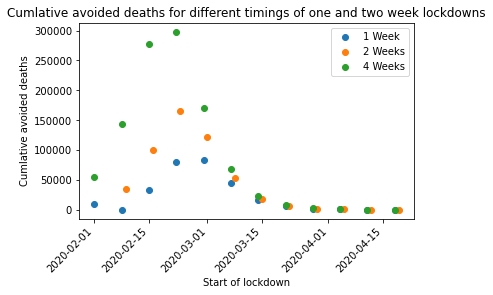

In [147]:
def main():
    folders = ["1 Week/", "2 Weeks/", "4 Weeks/"]#
    #folders = ["4 Weeks/"]
    fatfig, fatax = plt.subplots()
    fatax.set(title="Cumlative avoided deaths for different timings of one and two week lockdowns",
              xlabel="Start of lockdown",
              ylabel="Cumlative avoided deaths")
    fatfig.autofmt_xdate()
    plt.xticks(rotation=45)
    #plt.yscale("log")
    
    
    for folder in folders:
        ttime, tsus, texp, tinf, trec, tfat, xvar  = datacollector(folder)
        dates, totalFatalities = cumFat(tfat, xvar, folder)
        folder = folder.replace("/", "")    
        fatax.scatter(dates, totalFatalities, label = folder)
        
        #Fitting code
        #params, pcov  = sp.curve_fit(MBdis, dates+1, totalFatalities)
        #time_fit = np.linspace(dates[0], dates[-1], 100)
        #ydata = MBdis(time_fit, params[0], params[1])
        #fatax.plot(time_fit, ydata)
        
    fatax.legend()
main()
